In [133]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [134]:
X=df[["cgpa","iq"]].values
y=df["placement"].values


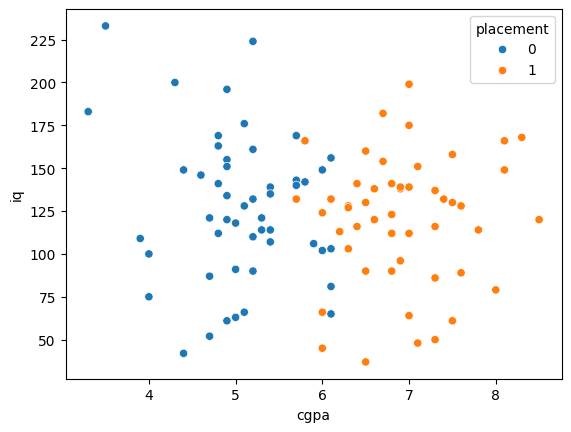

In [135]:
sns.scatterplot(
    x="cgpa",       
    y="iq",
    hue="placement",
    data=df
)
plt.show()


In [136]:


def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.001

    for i in range (1000):
        j=np.random.randint(0,X.shape[0])
        y_hat=step(np.dot(X[j],weights))
        weights=weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [137]:
def step(z):
    return 1 if z>0 else 0

In [138]:
intercept_,coef_ =perceptron(X,y)

In [139]:
print(coef_)
print(intercept_)





[1.1786 0.011 ]
0.955


In [140]:
m=-(coef_[0]/coef_[1])
c=-(intercept_/coef_[1])
m.round(5)
c.round(5)

np.float64(-86.81818)

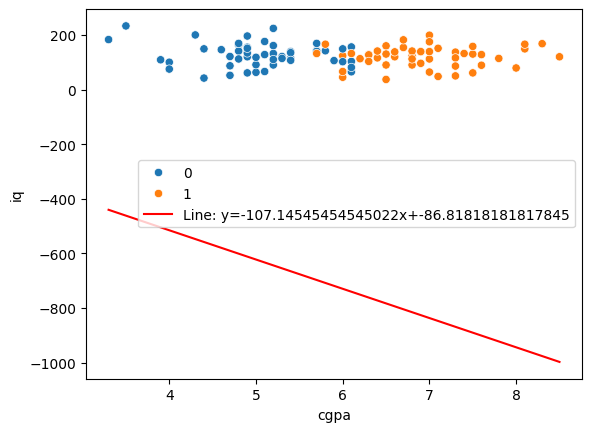

In [141]:
sns.scatterplot(
    x="cgpa",       
    y="iq",
    hue="placement",
    data=df
)
x_line = np.linspace(df["cgpa"].min(), df["cgpa"].max(), 100)
y_line = m * x_line + c

# Plot the line on top of scatter
plt.plot(x_line, y_line, color='red', label=f'Line: y={m}x+{c}')
plt.legend()
plt.show()
